Importing the libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Preprocessing

In [3]:
#Loading the data
Gold_data = pd.read_csv('gld_price_data.csv')

In [4]:
# print the first 5 rows
Gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#print the last 5 rows
Gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# No of rows and columns 
Gold_data.shape

(2290, 6)

In [8]:
# Getting some basic info about the data
Gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#Checking the no of missing values 
Gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# Statistical measures of the data
Gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Corrrelation

1.Positive Correlation


2.Negative Correlation

In [15]:
Numerical_columns = Gold_data.select_dtypes(include= ['number'])

In [16]:
Correlation = Numerical_columns.corr()

<Axes: >

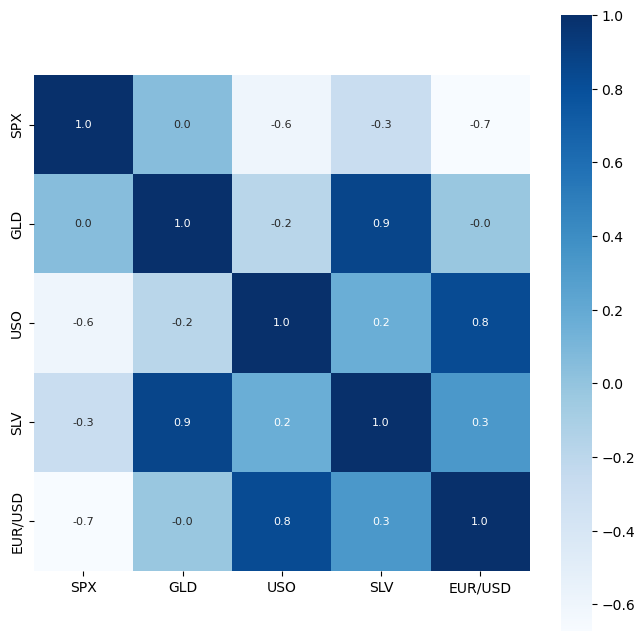

In [17]:
#Heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(Correlation,cbar = True,square=True,fmt ='.1f',annot = True, annot_kws = {'size':8},cmap='Blues')


In [18]:
# Correlation values of gld
print(Correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


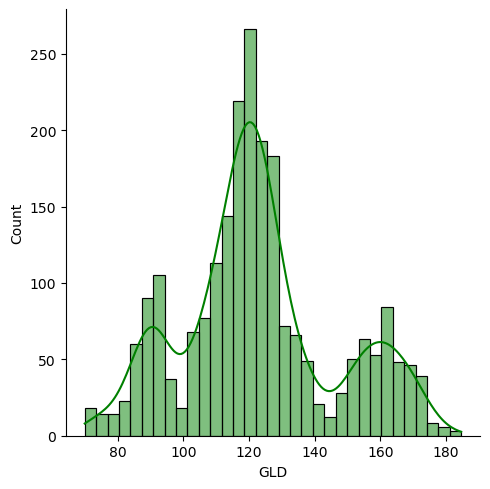

In [20]:
#Check the distribution of the gold price
sns.displot(Gold_data["GLD"],color = 'green',kde = True)

In [22]:
# Splitting the features and target
X = Gold_data.drop(['Date','GLD'],axis = 1)
y = Gold_data['GLD']

In [23]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [24]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

Train and test splitting

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

Model Training

Random Forest Regression

In [27]:
regressor = RandomForestRegressor(n_estimators=100)


In [28]:
#training the model
regressor.fit(X_train,y_train)

RandomForestRegressor()

Model evaluvation

In [31]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [32]:
print(test_data_prediction)

[168.67509953  81.83379995 115.97860028 127.609601   120.57110144
 154.80179746 150.05169787 126.18330037 117.4701986  126.01370094
 116.78030097 172.5272009  142.27489887 167.84749926 114.90840022
 117.5269005  136.81380327 169.9228002  159.7915029  159.3576
 155.10229974 124.79930054 176.01840024 157.08410343 125.16940037
  93.69689973  78.21680012 120.56570007 119.02539894 167.56009993
  88.12280067 125.14060022  91.19620069 117.74120053 121.11979929
 136.25890094 115.34870109 114.81030072 146.60199962 107.30550082
 104.56480276  87.34549816 126.4357009  117.94970069 152.53819872
 119.60170014 108.38529973 107.83049825  93.33600066 127.11149768
  75.4486     113.62169926 121.42409997 111.34549884 118.8665988
 120.50659967 159.41760046 166.37310089 146.94369703  85.85919858
  94.32390015  87.03039916  90.54739981 119.0369008  126.42700077
 127.5704003  168.8898998  122.32619924 117.24929907  98.46360051
 168.04780168 143.49759924 131.88030207 121.16330238 121.23259929
 119.76490029 1

In [33]:
# R squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9892186105443295


Compare the actual values and predictd values

In [34]:
y_test = list(y_test)

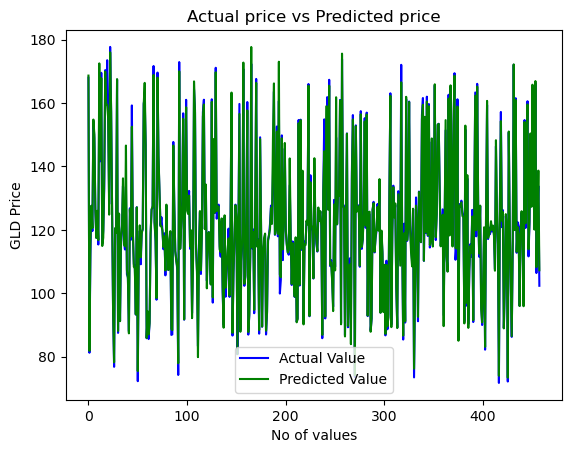

In [39]:
plt.plot(y_test,color = 'blue',label = 'Actual Value')
plt.plot(test_data_prediction,color = 'green',label = 'Predicted Value')
plt.title("Actual price vs Predicted price")
plt.xlabel('No of values')
plt.ylabel('GLD Price')
plt.legend()
